## Titanic

### 1. Module Import

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import matplotlib as mpl
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

### 2. Data Import

In [2]:
df = pd.read_csv('titanic_processed.csv')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1300,0,3,female,14.5000,1,0,14.4542,C
1301,0,3,female,22.0000,1,0,14.4542,C
1302,0,3,male,26.5000,0,0,7.2250,C
1303,0,3,male,27.0000,0,0,7.2250,C


### 3. 표본 분포 확인

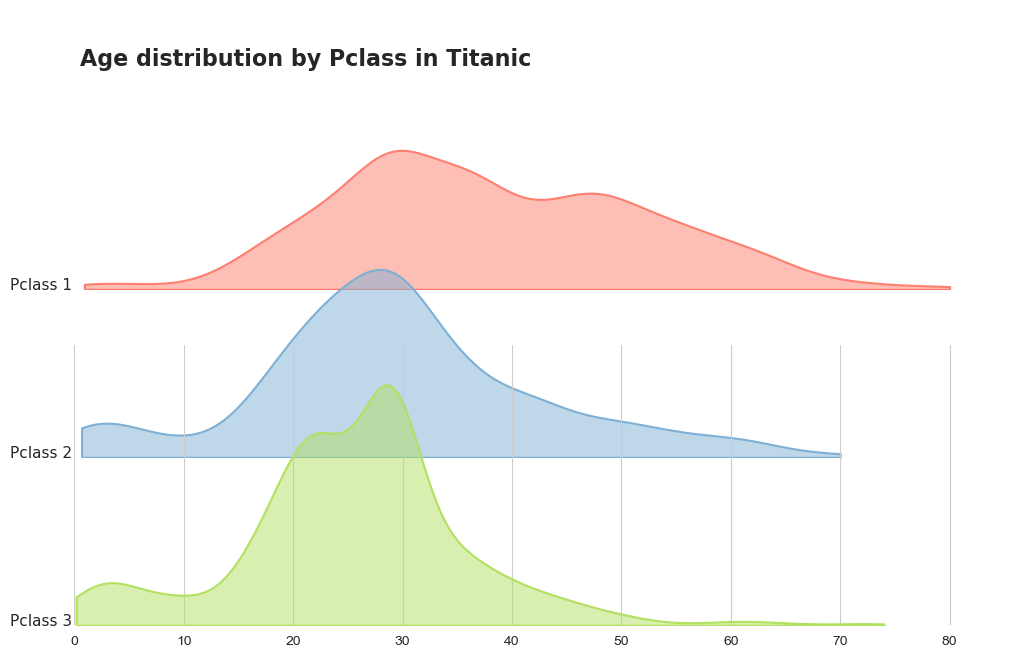

In [4]:
fig = plt.figure(figsize = (12,8))
gs = fig.add_gridspec(3,1)
gs.update(hspace = -0.4)

axes = list()
colors = ["#fd7f6f", "#7eb0d5", "#b2e061"]

for idx, cls, c in zip(range(3), sorted(df['pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    sns.kdeplot(x='age', data=df[df['pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.5,color=c, alpha=0.5) 
    
    axes[idx].set_ylim(0, 0.06)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='DejaVu Sans', fontsize=11, ha="right")

fig.text(0.13, 0.81, "Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='DejaVu Sans', fontsize=16)
plt.show() 

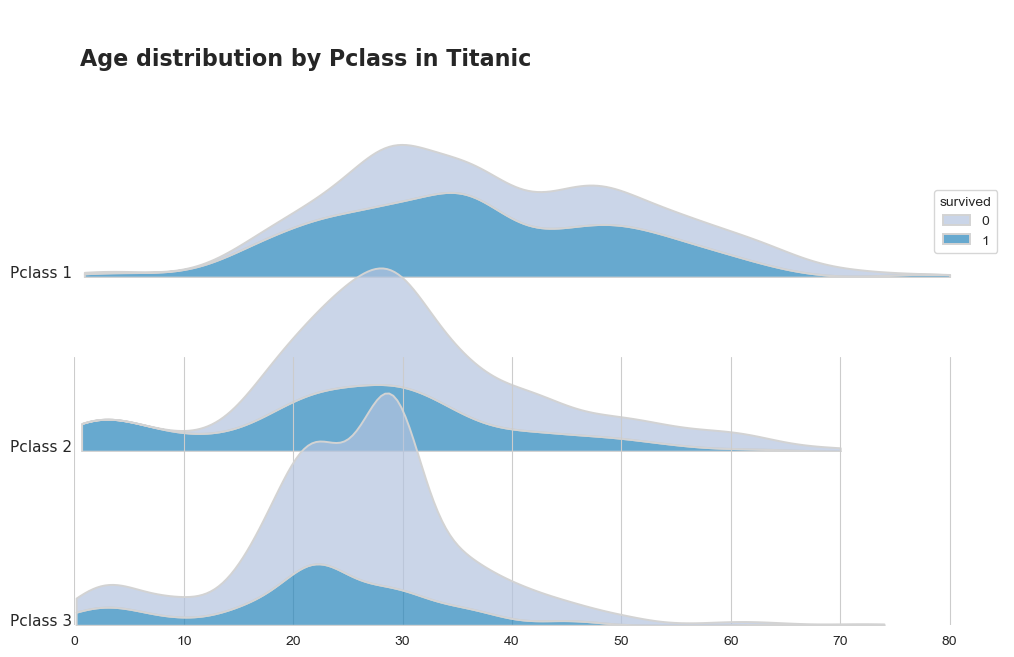

In [5]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.35)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(df['pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    sns.kdeplot(x = 'age', data = df[df['pclass'] == cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray', hue='survived', 
                multiple="stack", palette='PuBu', alpha=0.7
               ) 
    
    axes[idx].set_ylim(0, 0.06)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='DejaVu Sans', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()
        
fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='DejaVu Sans', fontsize=16)

plt.show()    

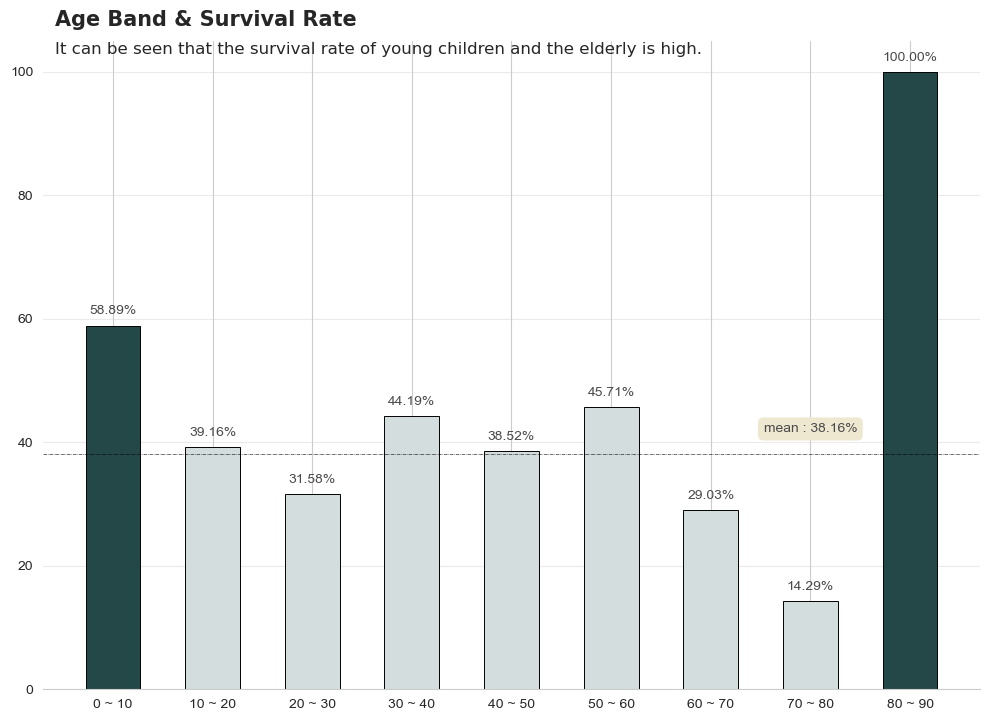

In [6]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

df['age_band'] = df['age'].apply(age_band)
titanic_age = df[['age_band', 'survived']].groupby('age_band')['survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747'

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')

mean = df['survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='DejaVu Sans')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='DejaVu Sans')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

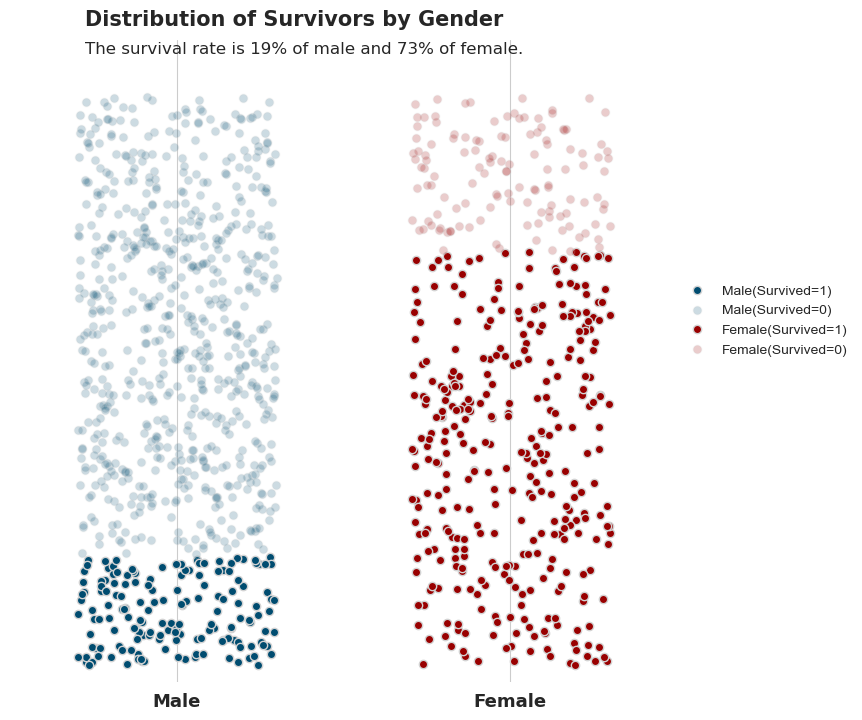

In [7]:
survival_rate = df.groupby(['sex']).mean()[['survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']

male_pos = np.random.uniform(0, male_rate, len(df[(df['sex']=='male') & (df['survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(df[(df['sex']=='male') & (df['survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(df[(df['sex']=='female') & (df['survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(df[(df['sex']=='female') & (df['survived']==0)]))

fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='DejaVu Sans', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)

fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight = 'bold', fontfamily = 'DejaVu Sans', fontsize=15)    
fig.text(0.1, 0.96, 'The survival rate is 19% of male and 73% of female.', fontweight='light', fontfamily='DejaVu Sans', fontsize=12)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

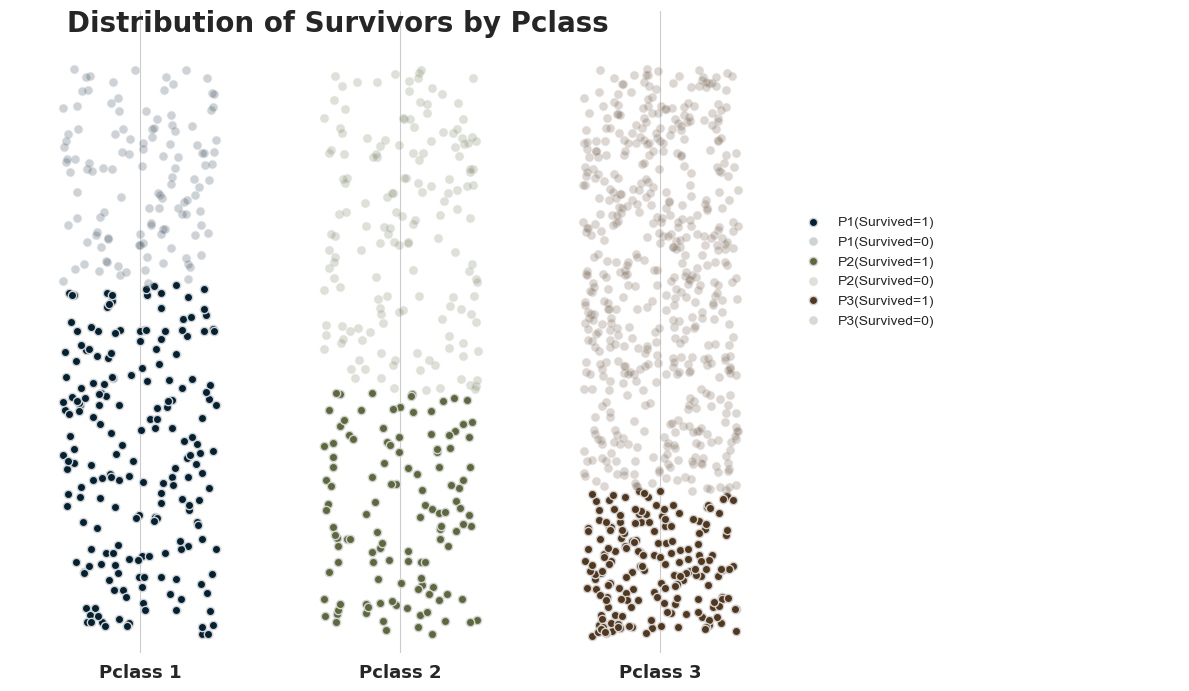

In [8]:
survival_rate = df.groupby(['pclass']).mean()[['survived']]
p1_rate = survival_rate.loc[1]
p2_rate = survival_rate.loc[2]
p3_rate = survival_rate.loc[3]

p1_pos = np.random.uniform(0, p1_rate, len(df[(df['pclass']==1) & (df['survived']==1)]))
p1_neg = np.random.uniform(p1_rate, 1, len(df[(df['pclass']==1) & (df['survived']==0)]))
p2_pos = np.random.uniform(0, p2_rate, len(df[(df['pclass']==2) & (df['survived']==1)]))
p2_neg = np.random.uniform(p2_rate, 1, len(df[(df['pclass']==2) & (df['survived']==0)]))
p3_pos = np.random.uniform(0, p3_rate, len(df[(df['pclass']==3) & (df['survived']==1)]))
p3_neg = np.random.uniform(p3_rate, 1, len(df[(df['pclass']==3) & (df['survived']==0)]))

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), p1_pos, color='#022133', edgecolor='lightgray', label='P1(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), p1_neg, color='#022133', edgecolor='lightgray', alpha=0.2, label='P1(Survived=0)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), p2_pos, color='#5c693b', edgecolor='lightgray', label='P2(Survived=1)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), p2_neg, color='#5c693b', edgecolor='lightgray', alpha=0.2, label='P2(Survived=0)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), p3_pos, color='#51371c', edgecolor='lightgray', label='P3(Survived=1)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), p3_neg, color='#51371c', edgecolor='lightgray', alpha=0.2, label='P3(Survived=0)')

ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Pclass 1', 'Pclass 2', 'Pclass 3'], fontweight='bold', fontfamily='DejaVu Sans', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)

fig.text(0.06, 0.95, 'Distribution of Survivors by Pclass', fontweight='bold', fontfamily='DejaVu Sans', fontsize=20, ha='left')    

ax.legend(loc=(0.67, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

### 4. Data Cleaning

#### 4.1 Dummy variables

In [9]:
df = pd.read_csv('titanic_processed.csv')

In [10]:
df.isnull().any()

survived    False
pclass      False
sex         False
age         False
sibsp       False
parch       False
fare        False
embarked    False
dtype: bool

Null값인 Data는 존재하지 않는다

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1305 non-null   int64  
 1   pclass    1305 non-null   int64  
 2   sex       1305 non-null   object 
 3   age       1305 non-null   float64
 4   sibsp     1305 non-null   int64  
 5   parch     1305 non-null   int64  
 6   fare      1305 non-null   float64
 7   embarked  1305 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.7+ KB


자료를 확인하니, 성별, 생존여부, 좌석등급 등 요금과 나이를 제외한 변수들은 연속형으로 사용하기에 어려워 보이는 것을 확인하였다. 

- **Target : survived**

- **범주형 데이터**
    - pclass (좌석 등급)
    - sex (성별)
    - sibsp (함께 탑승한 형제 또는 배우자 수)
    - parch (함께 탑승한 직계존속 혹은 직계비속 수)
    - embarked (탑승장소, S=Southhampton, C=Cherbourg, Q=Queenstown)

- **연속형 데이터**
    - fare (탑승 요금)
    - age (탑승객의 나이)
    
- 탑승객의 나이는 **소수점 단위(float형)**로 나뉘어 있었기에, **연속형**으로 구분하였다

In [12]:
df = pd.concat([df,pd.get_dummies(df[['pclass','sex','sibsp','parch','embarked']])], axis = 1)

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,pclass,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,female,29.0000,0,0,211.3375,S,1,0,0,1,0,0,0,1
1,1,1,male,0.9167,1,2,151.5500,S,1,1,2,0,1,0,0,1
2,0,1,female,2.0000,1,2,151.5500,S,1,1,2,1,0,0,0,1
3,0,1,male,30.0000,1,2,151.5500,S,1,1,2,0,1,0,0,1
4,0,1,female,25.0000,1,2,151.5500,S,1,1,2,1,0,0,0,1


#### 4.2 Log 변환
- fare와 같이 skewed되어 있고 분산이 큰 경우에는 log 변환을 고려해 볼 수 있다.
- 실제 분석에 원자료를 사용할지 변환을 사용할지 결정하고 이유를 설명하라.

Text(0.5, 1.0, 'Distribution of Fare')

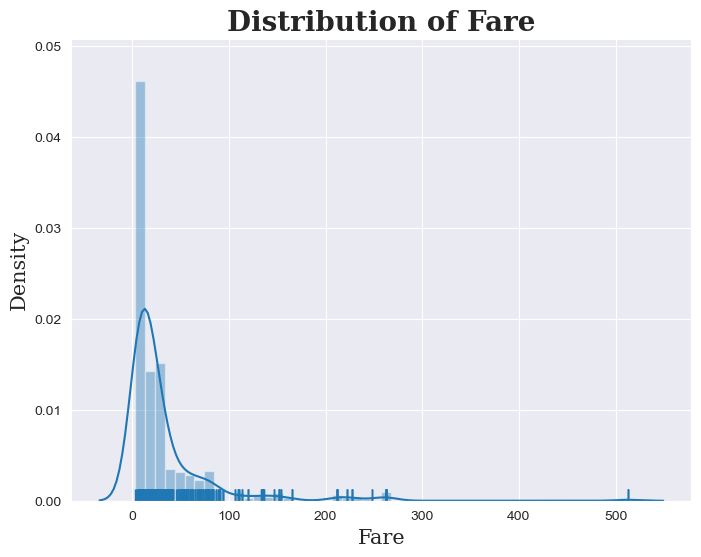

In [14]:
plt.figure(figsize = (8,6))
sns.set_style("darkgrid")
sns.distplot(df.fare, kde=True, rug=True)
plt.xlabel('Fare', fontsize = 15, fontfamily='Serif')
plt.ylabel('Density', fontsize = 15, fontfamily='Serif')
plt.title('Distribution of Fare', fontsize = 20, fontstyle = 'normal', fontweight='bold', fontfamily='Serif')

In [15]:
print('Mean : ', df.fare.mean())
print('Median : ', df.fare.median())
print('Variance : ', df.fare.var())

Mean :  33.464153333333485
Median :  14.4583
Variance :  2671.188796184478


fare의 분포와 분산을 확인해 본 결과, 확실히 **skewed** 되어있고 **분산이 매우 큰 것**을 확인할 수 있었다.

fare의 데이터를 로그 변환한 결과 다음과 같이 나타났다

Text(0.5, 1.0, 'Distribution of Fare')

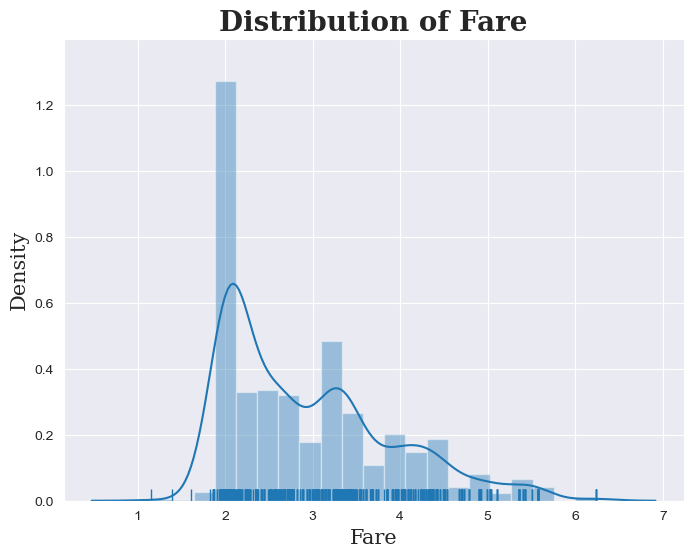

In [16]:
plt.figure(figsize = (8,6))
sns.set_style("darkgrid")
sns.distplot(np.log(df.fare), kde=True, rug=True)
plt.xlabel('Fare', fontsize = 15, fontfamily='Serif')
plt.ylabel('Density', fontsize = 15, fontfamily='Serif')
plt.title('Distribution of Fare', fontsize = 20, fontfamily='Serif', fontweight='bold')

In [17]:
print('Mean : ', np.log(df.fare).mean())
print('Median : ', np.log(df.fare).median())
print('Variance : ', np.log(df.fare).var())

Mean :  2.9441416483289515
Median :  2.671268644120752
Variance :  0.8994803384336592


Fare을 로그변환 한 결과, skewed와 분산의 문제가 어느정도 해결되었다. 데이터는 normalized에 가까울수록 좋으므로 **log변환된 fare 자료**를 쓰기로 하였다.

하지만, 로그변환을 해 주었으므로 해석에 매우 유의해야 한다.

In [18]:
df['log_fare'] = np.log(df.fare)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,pclass,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,log_fare
0,1,1,female,29.0000,0,0,211.3375,S,1,0,0,1,0,0,0,1,5.353456
1,1,1,male,0.9167,1,2,151.5500,S,1,1,2,0,1,0,0,1,5.020916
2,0,1,female,2.0000,1,2,151.5500,S,1,1,2,1,0,0,0,1,5.020916
3,0,1,male,30.0000,1,2,151.5500,S,1,1,2,0,1,0,0,1,5.020916
4,0,1,female,25.0000,1,2,151.5500,S,1,1,2,1,0,0,0,1,5.020916


log 변환된 fare 데이터를 넣어준다

#### 4.3 Multicollinearity

- 설명변수들의 상관관계를 파악하고 있으면 추정결과를 해석하는데 도움이 된다.
- 다중공선성은 소표본에서 추정량의 분산을 크게 하거나 overfitting의 원인이 될 수 있다.
- Feature 사이의 전반적인 관계는 variance inflation factor, 개별 변수 둘 사이의 관계는 correlation coefficient으로 확인한다.
- Titanic data inputs 사이의 correlation coefficient와 variance inflation factor를 계산하고 변수선정에 특별히 고려해야할 문제가 있는지 설명하라.

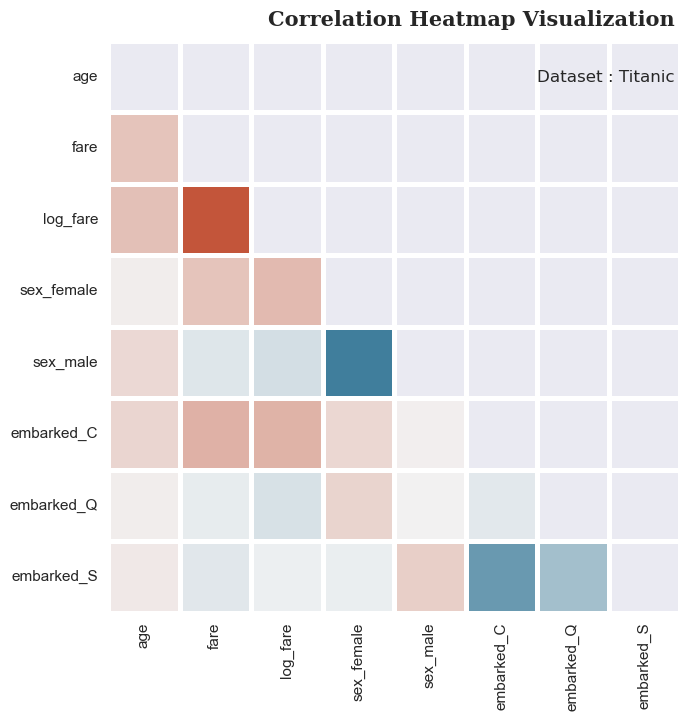

In [19]:
corr =  df.iloc[:,[3,6,16,11,12,13,14,15]].corr()

fig, ax = plt.subplots(1, 1, figsize = (7,7))

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_style('white')
sns.heatmap(corr, mask = mask, linewidth = 2.5, cmap = sns.diverging_palette(230, 20, as_cmap = True), cbar = False, ax = ax, square = True, linecolor='white')

ax.set_yticklabels(ax.get_xticklabels(), rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1, 'Correlation Heatmap Visualization', fontweight='bold', fontfamily='Serif', fontsize=15, ha='right')    
fig.text(0.97, 0.92, 'Dataset : Titanic', fontweight='light', fontfamily='DejaVu Sans', fontsize=12, ha='right')    

plt.tight_layout()
plt.show()

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='fare', ylabel='age'>,
        <AxesSubplot:xlabel='log_fare', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='fare'>,
        <AxesSubplot:xlabel='fare', ylabel='fare'>,
        <AxesSubplot:xlabel='log_fare', ylabel='fare'>],
       [<AxesSubplot:xlabel='age', ylabel='log_fare'>,
        <AxesSubplot:xlabel='fare', ylabel='log_fare'>,
        <AxesSubplot:xlabel='log_fare', ylabel='log_fare'>]], dtype=object)

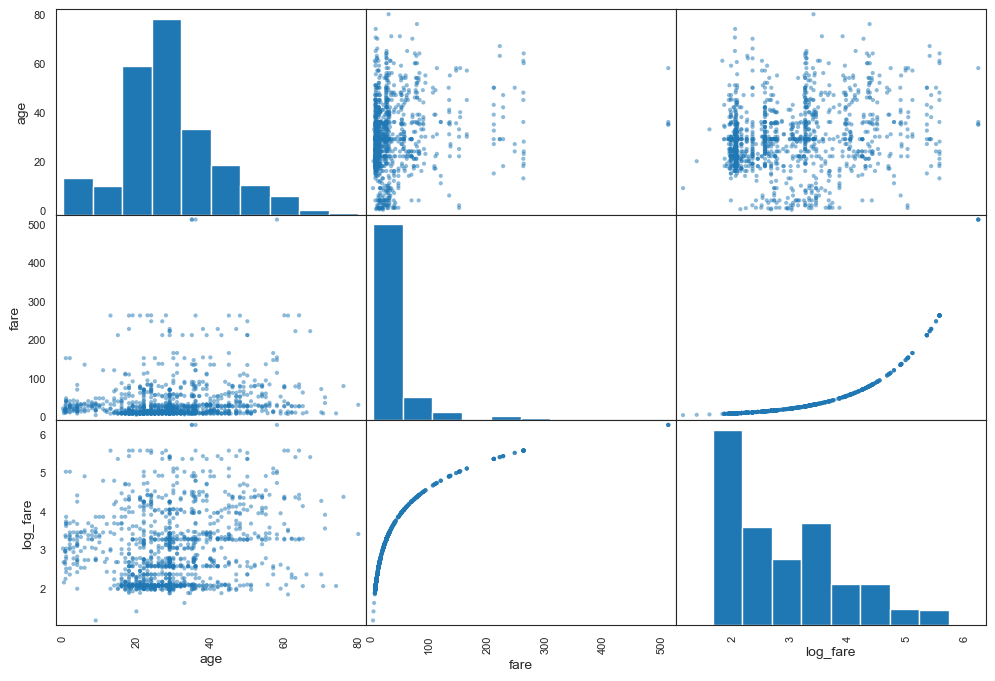

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.iloc[:,[3,6,16]], figsize = (12,8))

**Variance Inflation Factor**

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
temp = df.iloc[:,[0,3,16,11,12,13,14,15]]
for i in range(8) :
    print(temp.columns[i], ':', variance_inflation_factor(temp,i))

survived : 1.486054721818573
age : 1.0649677349916113
log_fare : 1.292498521863506
sex_female : inf
sex_male : inf
embarked_C : inf
embarked_Q : inf
embarked_S : inf


VIF 계산결과, 다중공선성이 심하게 나오는 편은 아닌 것으로 나타났다

In [23]:
import statsmodels.api as sm

y = df.survived
X = df.iloc[:,[3,16,11,12,13,14,15]]
X = sm.add_constant(X)

ols = sm.OLS(y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     126.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          4.30e-109
Time:                        17:30:26   Log-Likelihood:                -651.04
No. Observations:                1305   AIC:                             1314.
Df Residuals:                    1299   BIC:                             1345.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1538      0.024      6.429      0.000       0.107       0.201
age           -0.0025      0.001     -2.862      0.004      -0.004      -0.001
log_fare       0.0875      0.013      6.712      0.000       0.062       0.113
sex_female     0.3189      0.019     17.010      0.000       0.282       0.356
sex_male      -0.1651      0.015    -10.934      0.000      -0.195      -0.135
embarked_C     0.1406      0.025      5.576      0.000       0.091       0.190
embarked_Q     0.0030      0.028      0.109      0.913      -0.051       0.057
embarked_S     0.0102      0.017      0.588      0.557      -0.024       0.044
==============================================================================
Omnibus:                       40.804   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.078
Skew:                           0.446   Prob(JB):                     2.68e-10
Kurtosis:                       2.875   Cond. No.                     1.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

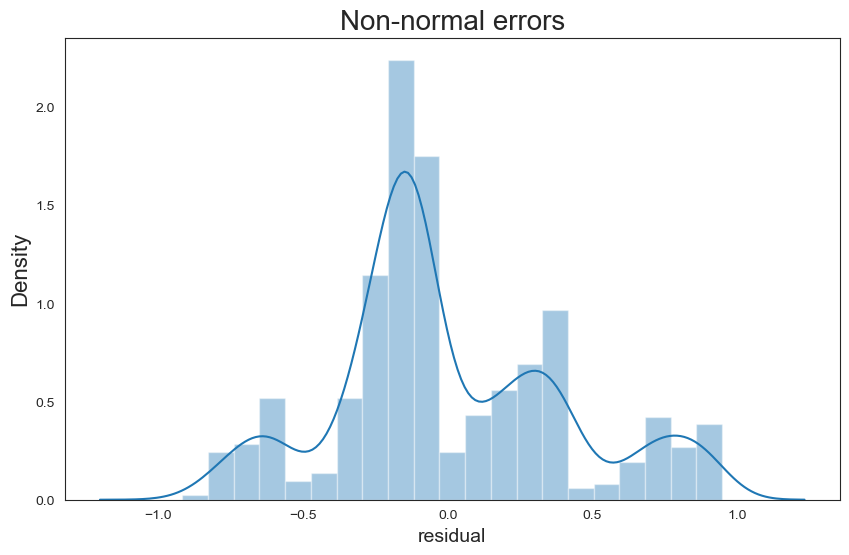

In [24]:
plt.figure(figsize = (10,6))
sns.distplot(ols.resid)
plt.title('Non-normal errors', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('residual', fontsize = 14)
plt.show()

OLS를 돌려본 결과, embarked 가변수 사이에서 p-value가 유의하지 않은 수준으로 나와, 변수간 OLS를 돌려보기로 하였다

In [25]:
target1 = df.iloc[:,13]
feature1 = sm.add_constant(df.iloc[:,14])

model1 = sm.OLS(target1, feature1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             embarked_C   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     35.85
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           2.75e-09
Time:                        17:30:26   Log-Likelihood:                -652.93
No. Observations:                1305   AIC:                             1310.
Df Residuals:                    1303   BIC:                             1320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2274      0.012     19.583      0.000       0.205       0.250
embarked_Q    -0.2274      0.038     -5.988      0.000      -0.302      -0.153
==============================================================================
Omnibus:                      244.380   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.031
Skew:                           1.366   Prob(JB):                     6.78e-89
Kurtosis:                       2.970   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
target2 = df.iloc[:,14]
feature2 = sm.add_constant(df.iloc[:,15])

model2 = sm.OLS(target2, feature2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             embarked_Q   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     413.9
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           4.01e-80
Time:                        17:30:27   Log-Likelihood:                -61.298
No. Observations:                1305   AIC:                             126.6
Df Residuals:                    1303   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3120      0.013     24.309      0.000       0.287       0.337
embarked_S    -0.3120      0.015    -20.344      0.000      -0.342      -0.282
==============================================================================
Omnibus:                      354.277   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              827.477
Skew:                           1.482   Prob(JB):                    2.07e-180
Kurtosis:                       5.535   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
target3 = df.iloc[:,13]
feature3 = sm.add_constant(df.iloc[:,15])

model3 = sm.OLS(target3, feature3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             embarked_C   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2012.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.68e-266
Time:                        17:30:27   Log-Likelihood:                -61.298
No. Observations:                1305   AIC:                             126.6
Df Residuals:                    1303   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6880      0.013     53.600      0.000       0.663       0.713
embarked_S    -0.6880      0.015    -44.858      0.000      -0.718      -0.658
==============================================================================
Omnibus:                      354.277   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              827.477
Skew:                          -1.482   Prob(JB):                    2.07e-180
Kurtosis:                       5.535   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

embarked_C와 embarked_S간 $R^2$값이 높게 나왔으므로, 변수간의 관계를 다시 한 번 살펴보고자 한다

### 5. Classification

- 표본을 training data와 test data로 나누고 2개 이상의 모형을 사용하여 분류모형을 만든다.
- Threshold 값은 표본비율을 고려하거나 training set의 성과를 고려해서 결정할 수도 있다.
- 모형의 특징을 참고하여 결과를 비교한다.

#### 5.1 Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score

y = df.survived
X = df.iloc[:,[3,16,11,12,13,14,15]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [29]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [30]:
predicted = logistic.predict(X_test)
accuracy_score(y_test, predicted)

0.8137755102040817

In [31]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       255
           1       0.74      0.72      0.73       137

    accuracy                           0.81       392
   macro avg       0.80      0.79      0.79       392
weighted avg       0.81      0.81      0.81       392



Text(0.5, 1.0, 'Confusion Matrix')

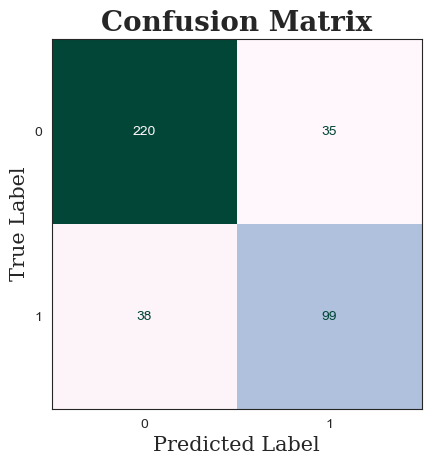

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

#### 5.2 Softmax

In [33]:
softmax = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial')

In [34]:
predicted = softmax.predict(X_test)
accuracy_score(y_test, predicted)

0.8137755102040817

In [35]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       255
           1       0.74      0.72      0.73       137

    accuracy                           0.81       392
   macro avg       0.80      0.79      0.79       392
weighted avg       0.81      0.81      0.81       392



Text(0.5, 1.0, 'Confusion Matrix')

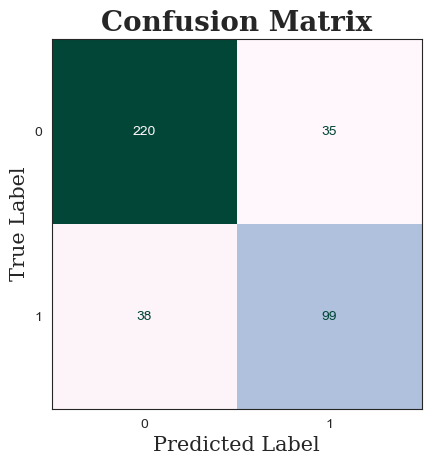

In [36]:
plot_confusion_matrix(softmax, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

#### 5.3 Stochastic Gradient Descent

In [37]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [38]:
predicted = sgd.predict(X_test)
accuracy_score(y_test, predicted)

0.7780612244897959

In [39]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       255
           1       0.75      0.55      0.64       137

    accuracy                           0.78       392
   macro avg       0.77      0.73      0.74       392
weighted avg       0.77      0.78      0.77       392



Text(0.5, 1.0, 'Confusion Matrix')

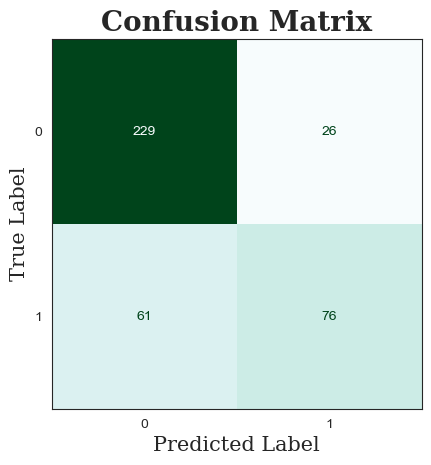

In [40]:
plot_confusion_matrix(sgd, X_test, y_test, cmap = 'BuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

#### 5.4 Support Vector Machine Classifier

In [41]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [42]:
predicted = svc.predict(X_test)
accuracy_score(y_test,predicted)

0.6964285714285714

In [43]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.69      0.96      0.81       255
           1       0.75      0.20      0.31       137

    accuracy                           0.70       392
   macro avg       0.72      0.58      0.56       392
weighted avg       0.71      0.70      0.63       392



Text(0.5, 1.0, 'Confusion Matrix')

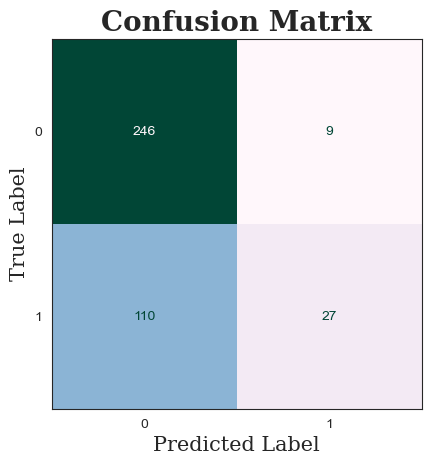

In [44]:
plot_confusion_matrix(svc, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

#### 5.5 Ensemble - Random Forest

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

randomforest = DecisionTreeClassifier()
randomforest.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
predicted = randomforest.predict(X_test)
accuracy_score(y_test, predicted)

0.7576530612244898

In [47]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       255
           1       0.65      0.66      0.66       137

    accuracy                           0.76       392
   macro avg       0.73      0.74      0.73       392
weighted avg       0.76      0.76      0.76       392



Text(0.5, 1.0, 'Confusion Matrix')

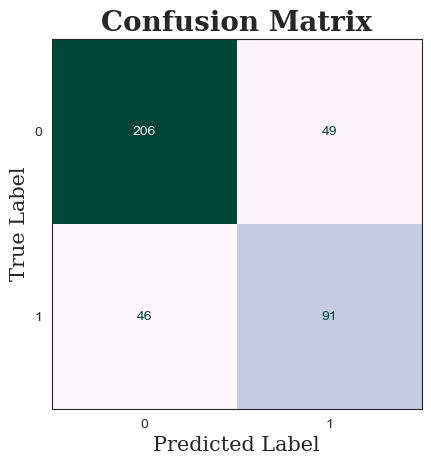

In [48]:
plot_confusion_matrix(randomforest, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

### 6. Model Selection

- GridSearch를 통해 최적의 hyper parameter를 구한다
- 보험시장에서 보험사의 불필요한 보험금 지급을 방지해야 하기 때문에, 예측 사망중 진짜 사망을 많이 잡아내야 하는 모델은 선택해야 한다.
- Test데이터에 대해서 모델의 성능을 예측한 결과, **Logistic Regression의 예측한 사망 중 실제로는 생존한 사람의 수가 가장 적게 나와 생존자에 대한 보험금 지급의 가능성이 가장 낮을 것으로 나타났다.**

In [54]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {'fit_intercept' : [True, False], 
                   'penalty' : ['l2', 'none'],
                   'C' : np.linspace(0,1000)}

gsearch = GridSearchCV(softmax, hyperparameters, verbose=1)
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(estimator=LogisticRegression(C=10, multi_class='multinomial'),
             param_grid={'C': array([   0.        ,   20.40816327,   40.81632653,   61.2244898 ,
         81.63265306,  102.04081633,  122.44897959,  142.85714286,
        163.26530612,  183.67346939,  204.08163265,  224.48979592,
        244.89795918,  265.30612245,  285.71428571,  306.12244898,
        326.53061224,  346.93877551,  367.34693878,  387.75510204,
        408.1632...
        489.79591837,  510.20408163,  530.6122449 ,  551.02040816,
        571.42857143,  591.83673469,  612.24489796,  632.65306122,
        653.06122449,  673.46938776,  693.87755102,  714.28571429,
        734.69387755,  755.10204082,  775.51020408,  795.91836735,
        816.32653061,  836.73469388,  857.14285714,  877.55102041,
        897.95918367,  918.36734694,  938.7755102 ,  959.18367347,
        979.59183673, 1000.        ]),
                         'fit_intercept': [True, False],
                         'penalty': ['l2'

In [55]:
print("tuned hpyerparameters :(best parameters) ", gsearch.best_params_)
print("accuracy :", gsearch.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.0, 'fit_intercept': True, 'penalty': 'none'}
accuracy : 0.7611721611721611


In [56]:
model = LogisticRegression(**gsearch.best_params_)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       255
           1       0.74      0.72      0.73       137

    accuracy                           0.81       392
   macro avg       0.80      0.79      0.79       392
weighted avg       0.81      0.81      0.81       392



Text(0.5, 1.0, 'Confusion Matrix')

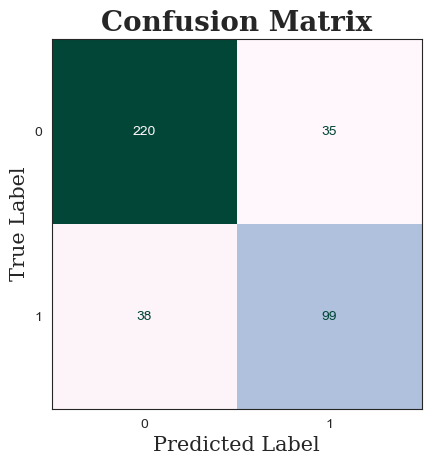

In [57]:
plot_confusion_matrix(model, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

최종 모델은 Logistic Regression, {'C': 0.0, 'fit_intercept': True, 'penalty': 'none'}으로 선정하였다